In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
df = pd.read_excel('Main.xlsx')

In [63]:
df.head()

,Area Name,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above
0,State - JAMMU & KASHMIR,3378518,385463,12541302,26.939133,3.073549
1,State - HIMACHAL PRADESH,963742,267936,6864602,14.039299,3.903154
2,State - PUNJAB,4886265,979525,27743338,17.612390,3.530667
3,State - CHANDIGARH,175200,91276,1055450,16.599555,8.648065
4,State - UTTARAKHAND,1929236,525301,10086292,19.127307,5.208069


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
Area Name                      35 non-null object
Illiterate                     35 non-null int64
Graduate & above               35 non-null int64
Total - Population             35 non-null int64
Percentage Illiterate          35 non-null float64
Percentage Graduate & above    35 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.7+ KB


In [7]:
# sns.pairplot(df)

In [64]:
df_means = df#df.drop(labels='Area Name', axis=1)

In [65]:
# df_means.head()
df_means.describe()

,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above
count,3.500000e+01,3.500000e+01,3.500000e+01,35.000000,35.000000
mean,7.678103e+06,1.075194e+06,3.459586e+07,20.101981,3.483161
std,1.133721e+07,1.399289e+06,4.445234e+07,5.762072,1.661141
min,8.337000e+03,1.482000e+03,6.447300e+04,11.176535,1.454525
25%,3.098615e+05,5.948800e+04,1.421136e+06,16.076337,2.333452
50%,3.378518e+06,5.253010e+05,1.678794e+07,19.405567,3.073549
75%,1.036886e+07,1.596484e+06,6.076749e+07,24.170387,4.106503
max,5.422576e+07,5.741485e+06,1.998123e+08,33.460356,8.648065


{'whiskers': [<matplotlib.lines.Line2D at 0x13a879cc550>,
 'caps': [<matplotlib.lines.Line2D at 0x13a879ccbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13a879cc400>],
 'medians': [<matplotlib.lines.Line2D at 0x13a879d62b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x13a879d65f8>],
 'means': []}

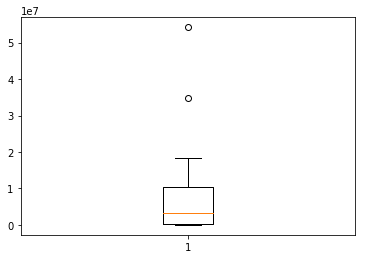

In [66]:
plt.boxplot(x='Illiterate', data=df_means)

In [67]:
Q1 = df_means.Illiterate.quantile(0.25)
Q3 = df_means.Illiterate.quantile(0.75)
IQR = Q3 - Q1

print(Q1, Q3, IQR)

df_means = df_means[(df_means.Illiterate >= Q1 - 1.5*IQR) & (df_means.Illiterate <= Q3 + 1.5*IQR)]

309861.5 10368863.0 10059001.5


{'whiskers': [<matplotlib.lines.Line2D at 0x13a879f73c8>,
 'caps': [<matplotlib.lines.Line2D at 0x13a879f7a58>,
 'boxes': [<matplotlib.lines.Line2D at 0x13a879f7278>],
 'medians': [<matplotlib.lines.Line2D at 0x13a87a00128>],
 'fliers': [<matplotlib.lines.Line2D at 0x13a87a00470>],
 'means': []}

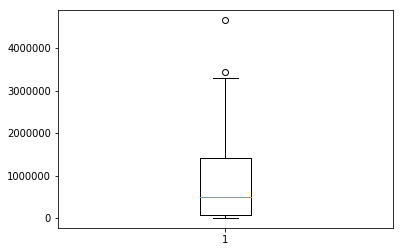

In [68]:
plt.boxplot(df_means['Graduate & above'])

In [69]:
Q1 = df_means['Graduate & above'].quantile(0.25)
Q3 = df_means['Graduate & above'].quantile(0.75)
IQR = Q3 - Q1

print(Q1, Q3, IQR)

58818.0 1407626.0 1348808.0


In [70]:
df_means = df_means[(df_means['Graduate & above'] >= Q1 - 1.5*IQR) & (df_means['Graduate & above'] <= Q3 + 1.5*IQR)]

{'whiskers': [<matplotlib.lines.Line2D at 0x13a87a352b0>,
 'caps': [<matplotlib.lines.Line2D at 0x13a87a35940>,
 'boxes': [<matplotlib.lines.Line2D at 0x13a87a35160>],
 'medians': [<matplotlib.lines.Line2D at 0x13a87a35fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x13a87a3e358>],
 'means': []}

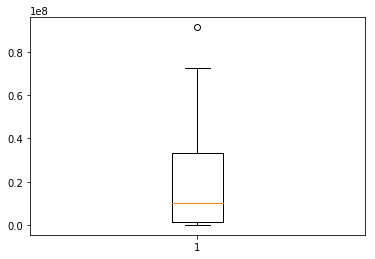

In [71]:
plt.boxplot(df_means['Total - Population'])

In [72]:
Q1 = df_means['Total - Population'].quantile(0.25)
Q3 = df_means['Total - Population'].quantile(0.75)
IQR = Q3 - Q1

print(Q1, Q3, IQR)
df_means = df_means[(df_means['Total - Population'] >= Q1 - 1.5*IQR) & (df_means['Total - Population'] <= Q3 + 1.5*IQR)]

1315840.0 33197097.5 31881257.5


{'whiskers': [<matplotlib.lines.Line2D at 0x13a87a72208>,
 'caps': [<matplotlib.lines.Line2D at 0x13a87a72898>,
 'boxes': [<matplotlib.lines.Line2D at 0x13a87a720b8>],
 'medians': [<matplotlib.lines.Line2D at 0x13a87a72f28>],
 'fliers': [<matplotlib.lines.Line2D at 0x13a87a7a2b0>],
 'means': []}

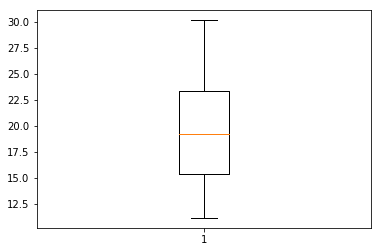

In [73]:
plt.boxplot(df_means['Percentage Illiterate'])

{'whiskers': [<matplotlib.lines.Line2D at 0x13a87aaeef0>,
 'caps': [<matplotlib.lines.Line2D at 0x13a87ab65c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13a87aaeda0>],
 'medians': [<matplotlib.lines.Line2D at 0x13a87ab6c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x13a87ab6f98>],
 'means': []}

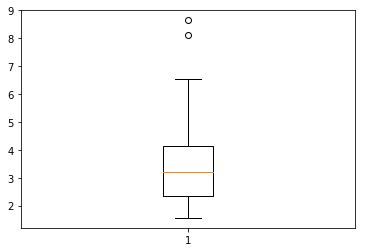

In [74]:
plt.boxplot(df_means['Percentage Graduate & above'])

In [75]:
Q1 = df_means['Percentage Graduate & above'].quantile(0.25)
Q3 = df_means['Percentage Graduate & above'].quantile(0.75)
IQR = Q3 - Q1

print(Q1, Q3, IQR)
df_means = df_means[(df_means['Percentage Graduate & above'] >= Q1 - 1.5*IQR) & (df_means['Percentage Graduate & above'] <= Q3 + 1.5*IQR)]

2.3310529659499104 4.1360518879830845 1.8049989220331741


In [76]:

df_means.head()

,Area Name,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above
0,State - JAMMU & KASHMIR,3378518,385463,12541302,26.939133,3.073549
1,State - HIMACHAL PRADESH,963742,267936,6864602,14.039299,3.903154
2,State - PUNJAB,4886265,979525,27743338,17.612390,3.530667
4,State - UTTARAKHAND,1929236,525301,10086292,19.127307,5.208069
5,State - HARYANA,5055536,1130659,25351462,19.941793,4.459936


In [77]:
df_means.shape

(28, 6)

In [78]:
df_means.describe()

,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above
count,2.800000e+01,2.800000e+01,2.800000e+01,28.000000,28.000000
mean,4.444283e+06,6.657303e+05,2.145959e+07,19.811414,3.222189
std,5.468418e+06,8.432701e+05,2.510917e+07,5.636705,1.177053
min,8.337000e+03,1.482000e+03,6.447300e+04,11.176535,1.561247
25%,2.046585e+05,4.759350e+04,1.349784e+06,14.920056,2.321150
50%,1.446489e+06,3.266995e+05,8.475447e+06,19.420603,3.054984
75%,8.138981e+06,1.017308e+06,3.309262e+07,23.800901,3.770290
max,1.845186e+07,3.285569e+06,7.262681e+07,30.126675,6.524685


In [79]:
df_means.head()

,Area Name,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above
0,State - JAMMU & KASHMIR,3378518,385463,12541302,26.939133,3.073549
1,State - HIMACHAL PRADESH,963742,267936,6864602,14.039299,3.903154
2,State - PUNJAB,4886265,979525,27743338,17.612390,3.530667
4,State - UTTARAKHAND,1929236,525301,10086292,19.127307,5.208069
5,State - HARYANA,5055536,1130659,25351462,19.941793,4.459936


In [83]:
sns.barplot(x=)

TypeError: bar() missing 1 required positional argument: 'height'

In [41]:
scaler = StandardScaler()
df_means = scaler.fit_transform(df_means)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [42]:
df_means = pd.DataFrame(df_means)

In [43]:
df_means.columns = ['Illiterate', 'Graduate & above', 'Total - Population',
       'Percentage Illiterate', 'Percentage Graduate & above']

In [44]:
df_means.head()

,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above
0,-0.198471,-0.338457,-0.361698,1.287723,-0.128599
1,-0.648160,-0.480385,-0.591928,-1.042814,0.589150
2,0.082308,0.378945,0.254849,-0.397285,0.266886
3,-0.468362,-0.169585,-0.461266,-0.123594,1.718122
4,0.113830,0.561457,0.157842,0.023555,1.070861


In [45]:
df_means.describe()

,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above
count,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01
mean,-1.982541e-17,-4.361590e-17,1.586033e-17,-7.137148e-17,5.947623e-17
std,1.018350e+00,1.018350e+00,1.018350e+00,1.018350e+00,1.018350e+00
min,-8.260791e-01,-8.021598e-01,-8.677198e-01,-1.560013e+00,-1.436997e+00
25%,-7.895194e-01,-7.464746e-01,-8.155916e-01,-8.836926e-01,-7.795519e-01
50%,-5.582609e-01,-4.094205e-01,-5.265967e-01,-7.060546e-02,-1.446606e-01
75%,6.880410e-01,4.245730e-01,4.717995e-01,7.207569e-01,4.742001e-01
max,2.608545e+00,3.163770e+00,2.075184e+00,1.863597e+00,2.857218e+00


In [62]:
hopkins(df_means)

0.7321736578084564

In [21]:
# df.columns

In [58]:
model_5 =KMeans(n_clusters=10, max_iter=100).fit(df_means)

In [59]:
model_5.cluster_centers_

array([[-0.68661371, -0.53118749, -0.69738933, -0.89914264,  1.99725773],
       [ 0.647718  , -0.00734   ,  0.46513459,  0.79796113, -1.06459436],
       [-0.77559142, -0.73517602, -0.7953936 , -0.81237601, -0.28151812],
       [ 2.57493297,  1.32274965,  1.992481  ,  1.10245877, -0.62498065],
       [ 1.00545796,  3.1637705 ,  2.05572572, -1.11429746,  1.1522339 ],
       [-0.61639039, -0.63493547, -0.69067459,  0.71872425,  0.02615237],
       [ 0.09806874,  0.47020109,  0.20634577, -0.18686489,  0.66887337],
       [ 1.2788323 ,  1.58425682,  1.59420696, -0.21550381,  0.02564943],
       [-0.70655832, -0.75260871, -0.7821109 ,  1.79572418, -1.008254  ],
       [-0.13233872,  0.89592832,  0.48451184, -1.56001251,  0.8578114 ]])

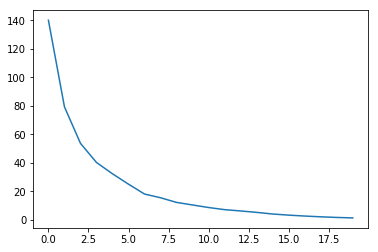

In [57]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_means)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [60]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

In [61]:
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(.1*n)
    
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
    
    rand_X = sample(range(0,n,1),m)
    
    ujd = []
    wjd = []
    
    for j in range(0,m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H